<a href="https://colab.research.google.com/github/EddersonPR/challenge-alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
from matplotlib.ticker import FuncFormatter
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
# Crear nueva columna Tienda en todos los dataframe
for n, df_tienda in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    df_tienda["Tienda"] = f"T{n}"

In [3]:
# Validación de columnas
for i, t in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"Tienda {i} columnas:", list(t.columns))

Tienda 1 columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda']
Tienda 2 columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda']
Tienda 3 columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda']
Tienda 4 columnas: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda']


In [4]:
# Unir dataframe para manejo de data
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index = True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  Tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB


In [5]:
# Validación del tipado - col: Fecha de compra esta como object o string
df.dtypes

,0
Producto,object
Categoría del Producto,object
Precio,float64
Costo de envío,float64
Fecha de Compra,object
Vendedor,object
Lugar de Compra,object
Calificación,int64
Método de pago,object
Cantidad de cuotas,int64


In [6]:
# Conteo de validación de dataframe
df['Tienda'].value_counts()

,count
Tienda,
T1,2359
T2,2359
T3,2359
T4,2358


In [7]:
# Modificación del tipado de la columna "Fecha de compra"
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')
df.head()

/tmp/ipython-input-1524029819.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'], errors='coerce')


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,2021-01-16,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,T1
1,Mesa de comedor,Muebles,192300.0,8400.0,2022-05-18,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,T1
2,Juego de mesa,Juguetes,209600.0,15900.0,2021-03-15,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,T1
3,Microondas,Electrodomésticos,757500.0,41000.0,2022-05-03,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,T1
4,Silla de oficina,Muebles,335200.0,20200.0,2020-11-07,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,T1


#1. Análisis de facturación



## Ingreso total por cada tienda

In [8]:
# Cálcular el ingreso total por cada tienda
df_ingresos = (
    df.groupby('Tienda')['Precio'].sum()
    .reset_index(name="Ingreso")          # 1. Convierte 'Tienda' a columna y crea índice numérico (0, 1, 2...)
    .sort_values(by='Ingreso', ascending=False)
    .set_index('Tienda')                  # 2. Establece 'Tienda' como índice y elimina el numérico
)

# Ahora, la visualización de la tabla será limpia por defecto
pd.options.display.float_format = '{:,.2f}'.format
display(df_ingresos)

,Ingreso
Tienda,
T1,"1,150,880,400.00"
T2,"1,116,343,500.00"
T3,"1,098,019,600.00"
T4,"1,038,375,700.00"


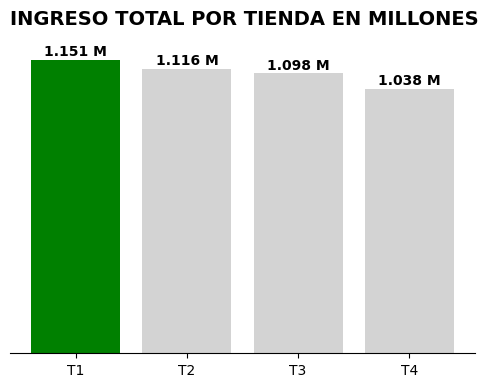

In [9]:

# referenciamos el df anterior, donde el índice 'Tienda' es una columna para el plot y este ordenado de mayor a menor
df_plot = df_ingresos.copy()

colores = []
for tienda in df_plot.index:
    if tienda == 'T1':
        colores.append('green')  # Destacamos T1 en rojo (el éxito engañoso)
    else:
        colores.append('lightgray') # El resto en gris bajo

# --- 3. Creación del Gráfico de Barras ---
plt.figure(figsize=(6, 4))
ax = plt.gca() # Obtener el eje actual para la manipulación de spines

barras = ax.bar(
    df_plot.index,
    df_plot['Ingreso'],
    color=colores
)

# Añadir etiquetas de datos
for bar in barras:
    yval = bar.get_height()
    # Formatear el valor para mostrarlo en miles de millones (ej: 1.15 B)
    label = f'{yval/1e9:,.3f} M'
    ax.text(
        bar.get_x() + bar.get_width()/2,
        yval * 1.005, # Ajuste fino para la posición
        label,
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold' # Destacar los valores
    )

# 4. Configuración de Limpieza y Alineación

# Título a la Izquierda
plt.title(
    'INGRESO TOTAL POR TIENDA EN MILLONES',
    loc='left', # Alineación a la izquierda
    fontsize=14,
    fontweight='bold',
    pad=15 # Espacio sobre el gráfico
)

# Eliminar Enmarcado (Spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

# Limpieza adicional de Ejes
ax.set_yticks([]) # Quitar los ticks del eje Y
ax.set_xlabel('') # Quitar la etiqueta del eje X ("Tienda")
ax.grid(False) # Asegurar que no hay grid

plt.show()

# 2. Ventas por categoría

In [10]:
df_categoria = (
    df.groupby(['Tienda', 'Categoría del Producto'])
      .size()
      .reset_index(name='Cantidad')
      .sort_values(['Tienda', 'Cantidad'], ascending=[True, False])
)

In [11]:
df_categoria = (
    df.groupby(['Tienda', 'Categoría del Producto'])
      .agg(
          Cantidad=('Precio', 'count'),
          Ingreso=('Precio', 'sum')
      )
      .reset_index() # Devuelve 'Tienda' y 'Categoría del Producto' a ser columnas normales
      .sort_values(['Tienda', 'Ingreso'], ascending=[True, False])
)

In [12]:
top3_categorias = df_categoria.groupby('Tienda').head(3)
display(top3_categorias)

,Tienda,Categoría del Producto,Cantidad,Ingreso
3,T1,Electrónicos,448,"429,493,500.00"
2,T1,Electrodomésticos,312,"363,685,200.00"
7,T1,Muebles,465,"187,633,700.00"
11,T2,Electrónicos,422,"410,831,100.00"
10,T2,Electrodomésticos,305,"348,567,800.00"
15,T2,Muebles,442,"176,426,300.00"
19,T3,Electrónicos,451,"410,775,800.00"
18,T3,Electrodomésticos,278,"329,237,900.00"
23,T3,Muebles,499,"201,072,100.00"
27,T4,Electrónicos,451,"409,476,100.00"


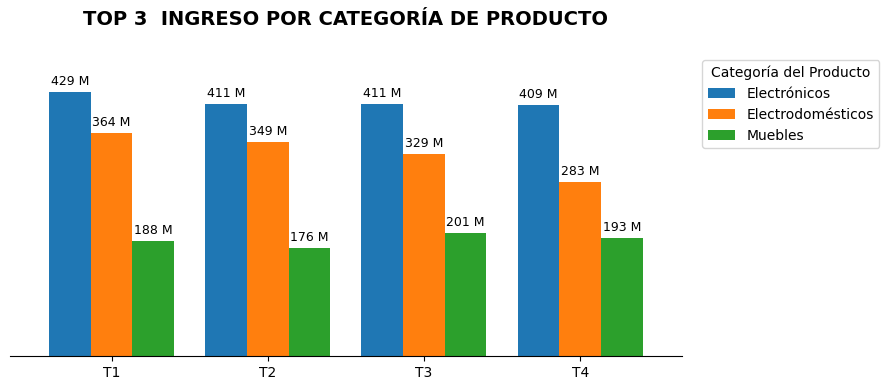

In [13]:

# 1. Pivotar el DataFrame para la visualización agrupada (Ingreso)
df_pivot_ingreso = top3_categorias.pivot(index='Tienda', columns='Categoría del Producto', values='Ingreso')

# 2. CALCULAR Y ORDENAR LAS COLUMNAS POR INGRESO TOTAL (de mayor a menor)
ingreso_total_por_categoria = df_pivot_ingreso.sum().sort_values(ascending=False)
categorias_ordenadas = ingreso_total_por_categoria.index.tolist()
df_pivot_ingreso = df_pivot_ingreso[categorias_ordenadas]

# 3. Definir Colores
colores_categorias = {
    'Electrónicos': '#1f77b4',
    'Electrodomésticos': '#ff7f0e',
    'Muebles': '#2ca02c'
}

# --- VISUALIZACIÓN: GRÁFICO DE BARRAS AGRUPADAS POR INGRESO (LIMPIO Y ETIQUETADO) ---

plt.figure(figsize=(9, 4))
ax = df_pivot_ingreso.plot(
    kind='bar',
    ax=plt.gca(),
    width=0.8,
    color=[colores_categorias.get(col, 'gray') for col in df_pivot_ingreso.columns]
)

# --- LIMPIEZA DEL GRÁFICO (Ejes, Cuadrícula y Marco) ---
ax.set_title(
    'TOP 3  INGRESO POR CATEGORÍA DE PRODUCTO',
    loc='center',
    fontsize=14,
    fontweight='bold',
    pad=20
)

ax.set_xlabel('')
ax.tick_params(axis='x', rotation=0)

# 1. Quitar el cuadro (spines) del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False) # Quita el borde del eje Y

# 2. Quitar la etiqueta del eje Y y los valores (ticks)
ax.set_ylabel('') # Quita la etiqueta del eje Y
ax.set_yticks([]) # Quita las marcas de valor del eje Y
ax.grid(False) # Asegura que no haya cuadrícula

# 3. Quitar el marco inferior (mantener solo la línea del eje X)
ax.spines['bottom'].set_visible(True)


# --- ETIQUETADO DE BARRAS EN LA PARTE SUPERIOR ---

# Función de formateo para el texto sobre la barra
def format_bar_label(value):
    # Formato: 429 M
    return f'{value*1e-6:.0f} M'

# Iterar sobre los contenedores de barras (uno por cada Categoría)
for container in ax.containers:
    # Iterar sobre las barras individuales dentro del contenedor
    for bar in container:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2, # Posición X (centro de la barra)
            yval + (df_pivot_ingreso.max().max() * 0.015), # Posición Y (ligeramente por encima de la barra)
            format_bar_label(yval),
            ha='center',
            va='bottom',
            fontsize=9
        )

# Leyenda
ax.legend(title='Categoría del Producto', bbox_to_anchor=(1.02, 1), loc='upper left')

# Ajustar el límite superior del eje Y para dejar espacio para las etiquetas
ax.set_ylim(0, df_pivot_ingreso.max().max() * 1.15)

plt.tight_layout()
plt.show()

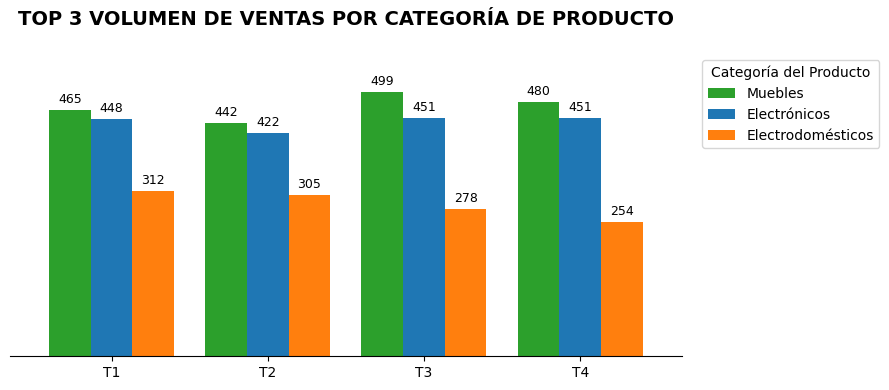

In [14]:
# 1. Pivotar el DataFrame por CANTIDAD (Volumen)
df_pivot_cantidad = top3_categorias.pivot(index='Tienda', columns='Categoría del Producto', values='Cantidad')

# 2. CALCULAR Y ORDENAR LAS COLUMNAS POR CANTIDAD TOTAL (de mayor a menor)
# Esto ordena las categorías de izquierda a derecha por volumen total.
cantidad_total_por_categoria = df_pivot_cantidad.sum().sort_values(ascending=False)
categorias_ordenadas = cantidad_total_por_categoria.index.tolist()
df_pivot_cantidad = df_pivot_cantidad[categorias_ordenadas]

# 3. Definir Colores (Mantenemos los mismos colores)
colores_categorias = {
    'Electrónicos': '#1f77b4',
    'Electrodomésticos': '#ff7f0e',
    'Muebles': '#2ca02c'
}

# --- VISUALIZACIÓN: GRÁFICO DE BARRAS AGRUPADAS POR CANTIDAD (LIMPIO Y ETIQUETADO) ---

plt.figure(figsize=(9, 4))
ax = df_pivot_cantidad.plot(
    kind='bar',
    ax=plt.gca(),
    width=0.8,
    color=[colores_categorias.get(col, 'gray') for col in df_pivot_cantidad.columns]
)

# --- LIMPIEZA DEL GRÁFICO ---
ax.set_title(
    'TOP 3 VOLUMEN DE VENTAS POR CATEGORÍA DE PRODUCTO',
    loc='center',
    fontsize=14,
    fontweight='bold',
    pad=20
)

ax.set_xlabel('')
ax.tick_params(axis='x', rotation=0)

# 1. Quitar el cuadro (spines) del gráfico
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

# 2. Quitar la etiqueta del eje Y y los valores (ticks)
ax.set_ylabel('')
ax.set_yticks([])
ax.grid(False)

# 3. Quitar el marco inferior (mantener solo la línea del eje X)
ax.spines['bottom'].set_visible(True)


# --- ETIQUETADO DE BARRAS EN LA PARTE SUPERIOR (CANTIDAD) ---

# Función de formateo simple para la cantidad
def format_bar_label(value):
    # Formato: 465 unidades
    return f'{int(value)}'

# Iterar sobre los contenedores de barras
for container in ax.containers:
    # Iterar sobre las barras individuales
    for bar in container:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval + (df_pivot_cantidad.max().max() * 0.015), # Ligeramente por encima
            format_bar_label(yval),
            ha='center',
            va='bottom',
            fontsize=9
        )

# Leyenda
ax.legend(title='Categoría del Producto', bbox_to_anchor=(1.02, 1), loc='upper left')

# Ajustar el límite superior del eje Y
ax.set_ylim(0, df_pivot_cantidad.max().max() * 1.15)

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [15]:
df_calificacion = df.groupby('Tienda')['Calificación'].mean().reset_index(name='Calificación Prom.').sort_values(by='Calificación Prom.', ascending=False).set_index('Tienda')
df_calificacion

,Calificación Prom.
Tienda,
T3,4.05
T2,4.04
T4,4.00
T1,3.98


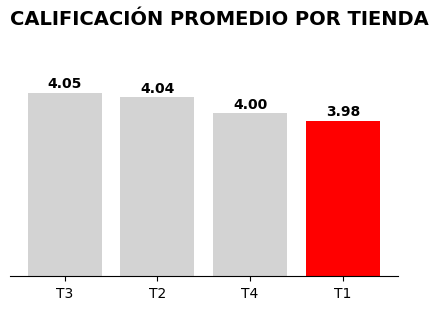

In [16]:
df_plot = df_calificacion # df_calificacion contiene el índice 'Tienda' y la columna 'Calificación Prom.'

colores = []
calificacion_minima = df_plot['Calificación Prom.'].min()

# Recorremos la columna para asignar colores
for i in df_plot['Calificación Prom.']:
    if i == calificacion_minima:
        colores.append('red') # T1 es la única en rojo
    else:
        colores.append('lightgray')

# Creación de Gráfico
plt.figure(figsize=(5,3)) # Dimensionamos el gráfico ancho y altura
ax = plt.gca() # Obtenemos los ejes (y/x) del gráfico para manipular

# Barras
Barras = ax.bar(df_plot.index, df_plot['Calificación Prom.'], color=colores)

# 1. Encontrar el valor mínimo de datos (ej. 3.98)
valor_minimo = df_plot['Calificación Prom.'].min()
# 2. Establecer el límite inferior del eje Y un poco por debajo del mínimo (ej. 3.75)
ax.set_ylim(valor_minimo * 0.90, df_plot['Calificación Prom.'].max() * 1.03)

# 3. Añadir etiquetas de datos
for bar in Barras:
    yval = bar.get_height()
    # Mostramos el valor real de la calificación con dos decimales
    label = f'{yval:.2f}'
    ax.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.005, # Ligeramente por encima de la barra
        label,
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Configuración de Limpieza y Alineación
ax.set_title('CALIFICACIÓN PROMEDIO POR TIENDA', loc='left', fontsize=14, fontweight='bold', pad=15)
ax.set_yticks([]) # Quitamos las marcas del Eje Y
ax.set_xlabel('') # Quitamos la etiqueta del eje X ("Tienda")
ax.grid(False) # Asegurar que no hay grid

# Eliminar Enmarcado y Ejes innecesarios (Spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False) # Dejamos el spine izquierdo invisible también, ya que las marcas fueron eliminadas.

plt.grid(False)

plt.show()

# 4. Productos más y menos vendidos

In [17]:
df_producto = (
    df.groupby(['Tienda', 'Producto'])
      .size()
      .reset_index(name='Cantidad')
      .sort_values(['Tienda', 'Cantidad'], ascending=[True, False])
)

In [18]:
# Más vendidos (por tienda)
top_productos = df_producto.groupby('Tienda').head(1)
top_productos

,Tienda,Producto,Cantidad
1,T1,Armario,60
75,T2,Iniciando en programación,65
129,T3,Kit de bancas,57
163,T4,Cama box,62


In [19]:
# Menos vendidos (por tienda)
bottom_productos = df_producto.groupby('Tienda').tail(1)
bottom_productos

,Tienda,Producto,Cantidad
13,T1,Celular ABXY,33
77,T2,Juego de mesa,32
111,T3,Bloques de construcción,35
175,T4,Guitarra eléctrica,33


# 5. Envío promedio por tienda

> Agregar bloque entrecomillado



In [20]:
df_envio = df.groupby(['Tienda'])['Costo de envío'].mean().reset_index(name="Costo Promedio Envío").sort_values(by='Costo Promedio Envío', ascending=False).set_index('Tienda')
df_envio

,Costo Promedio Envío
Tienda,
T1,"26,018.61"
T2,"25,216.24"
T3,"24,805.68"
T4,"23,459.46"


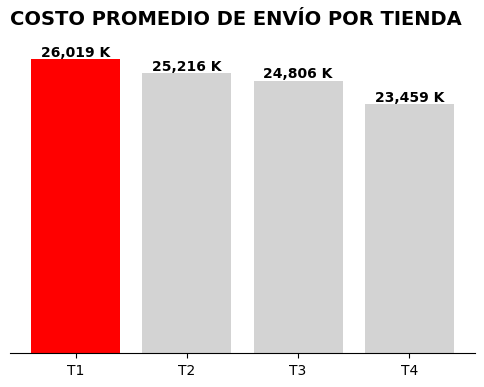

In [21]:
df_plot = df_envio.copy()

envio_maximo = df_plot['Costo Promedio Envío'].max()
colores = []

for i in df_plot['Costo Promedio Envío']:
    if i == envio_maximo:
      colores.append('red')
    else:
      colores.append('lightgray')


# Gráfico
plt.figure(figsize=(6,4))
ax = plt.gca()

# Barras
Barras = ax.bar(df_plot.index,df_plot['Costo Promedio Envío'], color = colores)

# valores mínimo
valor_minimo = df_plot['Costo Promedio Envío'].min()

# Establecer limite inferior
ax.set_ylim(valor_minimo*0.4,df_plot['Costo Promedio Envío'].max()*1.03)

# Añadir datos
for bar in Barras:
    yval = bar.get_height()
    # Mostramos el valor real de la calificación con dos decimales
    label = f'{yval:,.0f} K'
    ax.text(
        bar.get_x() + bar.get_width()/2,
        yval + 0.005, # Ligeramente por encima de la barra
        label,
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Configuración de Limpieza y Alineación
ax.set_title('COSTO PROMEDIO DE ENVÍO POR TIENDA', loc='left', fontsize=14, fontweight='bold', pad=15)
ax.set_yticks([]) # Quitamos las marcas del Eje Y
ax.set_xlabel('') # Quitamos la etiqueta del eje X ("Tienda")
ax.grid(False) # Asegurar que no hay grid

# Eliminar Enmarcado y Ejes innecesarios (Spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False) # Dejamos el spine izquierdo invisible también, ya que las marcas fueron eliminadas.

plt.grid(False)

plt.show()


# 6. Análisis del desempeño geográfico

## Gráfico de dispersión con Matplotlib

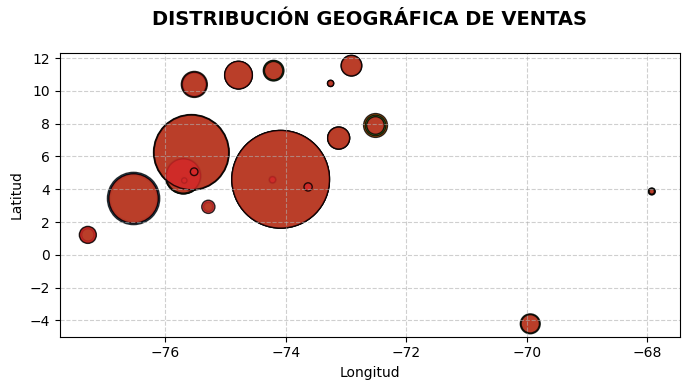

In [22]:

df_heatmap = df.groupby(['lon', 'lat', 'Tienda']).size().reset_index(name='Conteo')
tienda_totales = df_heatmap.groupby('Tienda')['Conteo'].sum()
tiendas_ordenadas = tienda_totales.sort_values(ascending=False).index.tolist()

# Define la lista de tiendas objetivo
tiendas_objetivo = ['T1', 'T2', 'T3', 'T4']

# *** PASO CRÍTICO: FILTRAR EL DATAFRAME ***
df_heatmap = df_heatmap[df_heatmap['Tienda'].isin(tiendas_objetivo)].copy()

# Ahora, la lista de ordenamiento solo contiene T1, T2, T3, T4
tiendas_ordenadas = tiendas_objetivo

# --- VISUALIZACIÓN E ITERACIÓN (El Bucle Corrector) ---
plt.figure(figsize=(7, 4))

# REINICIO DE LA PALETA: Mantenemos para eliminar colores residuales.
plt.gca().set_prop_cycle(None)

# Bucle ÚNICO: Dibuja los puntos y crea los handles de la leyenda
for tienda in tiendas_ordenadas:
    # Ahora 'data' es un subconjunto de un DataFrame ya filtrado
    data = df_heatmap[df_heatmap['Tienda'] == tienda]

    # 1. DIBUJAR LOS PUNTOS (SCATTER)
    plt.scatter(
        data['lon'],
        data['lat'],
        s=data['Conteo'] * 5,
        alpha=0.8,
        edgecolors='k',
        linewidths=1
    )


# --- LEYENDA Y LIMPIEZA ---
plt.title('DISTRIBUCIÓN GEOGRÁFICA DE VENTAS', loc='center', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [23]:
# Definición de regiones (basado en el patrón geográfico)
clases = {
    'Central': ((-76, -73), (3, 8)),
    'Norte': ((-76, -73), (9, 12)),
    'Sur': ((-71, -69), (-5, 0))
}

# 1. Función para clasificar cada fila en una región
def clasificar_region(row):
    lon, lat = row['lon'], row['lat']
    for region, ((lon_min, lon_max), (lat_min, lat_max)) in clases.items():
        if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
            return region
    return 'Fuera de Clúster'

# 2. Asignar la región a cada venta en el DataFrame
# Se asume que 'df' aún tiene la columna 'Region' de la ejecución anterior, pero la recalculamos por seguridad
df['Region'] = df.apply(clasificar_region, axis=1)

# 3. CONTEO DE INGRESO POR TIENDA Y REGIÓN (USANDO 'Precio')
# En lugar de .size(), usamos .agg() o .sum()
ingreso_region = df.groupby(['Tienda', 'Region'])['Precio'].sum().reset_index(name='Ingreso_Regional')

# 4. CÁLCULO DEL INGRESO TOTAL POR TIENDA
# Sumamos la columna 'Precio' directamente
total_tienda_ingreso = df.groupby('Tienda')['Precio'].sum().rename('Total_Tienda_Ingreso')

# 5. UNIR LOS TOTALES AL DATAFRAME DE INGRESO REGIONAL
ingreso_region = ingreso_region.merge(total_tienda_ingreso.reset_index(), on='Tienda')

# 6. CALCULAR EL PORCENTAJE DE INGRESO POR REGIÓN
ingreso_region['% de Ingreso'] = (ingreso_region['Ingreso_Regional'] / ingreso_region['Total_Tienda_Ingreso']) * 100

# 7. PIVOTAR PARA LA TABLA DE RENDIMIENTO FINAL
tabla_rendimiento_ingreso = ingreso_region.pivot_table(
    index='Tienda',
    columns='Region',
    values='% de Ingreso',
    fill_value=0
).round(1)

print("\n### TABLA DE RENDIMIENTO REGIONAL (% del ingreso total de la tienda) ###")
print(tabla_rendimiento_ingreso)


### TABLA DE RENDIMIENTO REGIONAL (% del ingreso total de la tienda) ###
Region  Central  Fuera de Clúster  Norte  Sur
Tienda                                       
T1        72.50             20.20   6.00 1.30
T2        76.80             16.00   5.80 1.40
T3        75.30             15.10   7.90 1.70
T4        73.90             17.40   7.10 1.60


In [24]:
# Definición de regiones (basado en el patrón geográfico)
clases = {
    'Central': ((-76, -73), (3, 8)),
    'Norte': ((-76, -73), (9, 12)),
    'Sur': ((-71, -69), (-5, 0))
}

# 1. Función para clasificar cada fila en una región
def clasificar_region(row):
    lon, lat = row['lon'], row['lat']
    for region, ((lon_min, lon_max), (lat_min, lat_max)) in clases.items():
        if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
            return region
    return 'Fuera de Clúster'

# 2. Asignar la región a cada venta en el DataFrame
# Se asume que 'df' aún tiene la columna 'Region' de la ejecución anterior, pero la recalculamos por seguridad
df['Region'] = df.apply(clasificar_region, axis=1)

# 3. CONTEO DE INGRESO POR TIENDA Y REGIÓN (USANDO 'Precio')
# En lugar de .size(), usamos .agg() o .sum()
ingreso_region = df.groupby(['Tienda', 'Region'])['Precio'].sum().reset_index(name='Ingreso_Regional')

# 4. CÁLCULO DEL INGRESO TOTAL POR TIENDA
# Sumamos la columna 'Precio' directamente
total_tienda_ingreso = df.groupby('Tienda')['Precio'].sum().rename('Total_Tienda_Ingreso')

# 5. UNIR LOS TOTALES AL DATAFRAME DE INGRESO REGIONAL
ingreso_region = ingreso_region.merge(total_tienda_ingreso.reset_index(), on='Tienda')

# 1. Función para clasificar cada fila en una región
def clasificar_region(row):
    lon, lat = row['lon'], row['lat']
    for region, ((lon_min, lon_max), (lat_min, lat_max)) in clases.items():
        if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
            return region
    return 'Fuera de Clúster'

# 2. Asignar la región a cada venta en el DataFrame
df['Region'] = df.apply(clasificar_region, axis=1)

# 3. CONTEO DE INGRESO POR TIENDA Y REGIÓN (USANDO 'Precio')
ingreso_region = df.groupby(['Tienda', 'Region'])['Precio'].sum().reset_index(name='Ingreso_Regional')

# 4. CÁLCULO DEL INGRESO TOTAL POR TIENDA
total_tienda_ingreso = df.groupby('Tienda')['Precio'].sum().rename('Total_Tienda_Ingreso')

# 5. UNIR LOS TOTALES AL DATAFRAME DE INGRESO REGIONAL (Necesario para el cálculo de % en otros scripts, lo mantenemos)
ingreso_region = ingreso_region.merge(total_tienda_ingreso.reset_index(), on='Tienda')

# 6. (Opcional): Si ya tienes el ingreso_region, puedes saltar el cálculo de porcentaje.
#     Si no lo necesitas, puedes comentarlo.

# 7. PIVOTAR PARA LA TABLA DE INGRESO REGIONAL ABSOLUTO
tabla_ingreso_absoluto_regional = ingreso_region.pivot_table(
    index='Tienda',
    columns='Region',
    values='Ingreso_Regional', # <-- ¡EL CAMBIO CLAVE AQUÍ!
    fill_value=0
)

# Aplicar formato de moneda para mejor visualización
pd.options.display.float_format = '{:,.0f}'.format

print("\n### TABLA DE INGRESO ABSOLUTO REGIONAL (Moneda) ###")
print(tabla_ingreso_absoluto_regional)


### TABLA DE INGRESO ABSOLUTO REGIONAL (Moneda) ###
Region     Central  Fuera de Clúster      Norte        Sur
Tienda                                                    
T1     834,587,800       232,098,800 69,524,000 14,669,800
T2     856,916,200       179,049,600 64,218,700 16,159,000
T3     826,458,200       165,973,500 86,375,100 19,212,800
T4     767,328,000       180,653,200 73,286,200 17,108,300


In [25]:
# Definición de regiones (basado en el patrón geográfico) - Se mantiene
clases = {
    'Central': ((-76, -73), (3, 8)),
    'Norte': ((-76, -73), (9, 12)),
    'Sur': ((-71, -69), (-5, 0))
}

# 1. Función para clasificar cada fila en una región - Se mantiene
def clasificar_region(row):
    lon, lat = row['lon'], row['lat']
    for region, ((lon_min, lon_max), (lat_min, lat_max)) in clases.items():
        if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
            return region
    return 'Fuera de Clúster'

# 2. Asignar la región a cada venta en el DataFrame - Se mantiene
df['Region'] = df.apply(clasificar_region, axis=1)

# 3. CONTEO DE TRANSACCIONES POR TIENDA Y REGIÓN (¡NUEVA AGREGACIÓN!)
# Agrupamos por Tienda y Región y contamos el número de filas (transacciones)
conteo_transacciones = df.groupby(['Tienda', 'Region']).size().reset_index(name='Conteo_Transacciones')

# 4. PIVOTAR PARA LA TABLA DE CONTEO FINAL
tabla_conteo_regional = conteo_transacciones.pivot_table(
    index='Tienda',
    columns='Region',
    values='Conteo_Transacciones', # <-- ¡EL VALOR A MOSTRAR!
    fill_value=0
)

# 5. Aplicar formato para una visualización limpia (sin decimales)
pd.options.display.float_format = '{:,.0f}'.format

print("\n### TABLA DE CONTEO DE TRANSACCIONES POR REGIÓN ###")
print(tabla_conteo_regional)


### TABLA DE CONTEO DE TRANSACCIONES POR REGIÓN ###
Region  Central  Fuera de Clúster  Norte  Sur
Tienda                                       
T1        1,756               408    163   32
T2        1,784               349    192   34
T3        1,772               366    180   41
T4        1,760               381    182   35


In [26]:
# Definición de regiones (basado en el patrón geográfico) - Se mantiene
clases = {
    'Central': ((-76, -73), (3, 8)),
    'Norte': ((-76, -73), (9, 12)),
    'Sur': ((-71, -69), (-5, 0))
}

# 1. Función para clasificar cada fila en una región - Se mantiene
def clasificar_region(row):
    lon, lat = row['lon'], row['lat']
    for region, ((lon_min, lon_max), (lat_min, lat_max)) in clases.items():
        if lon_min <= lon <= lon_max and lat_min <= lat <= lat_max:
            return region
    return 'Fuera de Clúster'

# 2. Asignar la región a cada venta en el DataFrame - Se mantiene
df['Region'] = df.apply(clasificar_region, axis=1)

# 3. CÁLCULO del COSTO PROMEDIO de ENVÍO POR TIENDA Y REGIÓN (¡NUEVA AGREGACIÓN!)
costo_promedio_region = df.groupby(['Tienda', 'Region'])['Costo de envío'].mean().reset_index(name='Costo_Promedio_Regional')

# 4. PIVOTAR PARA LA TABLA DE COSTO PROMEDIO REGIONAL
tabla_costo_promedio_regional = costo_promedio_region.pivot_table(
    index='Tienda',
    columns='Region',
    values='Costo_Promedio_Regional', # <-- Valor a mostrar
    fill_value=0
)

# Aplicar formato de miles (K) para la mejor visualización de costos
pd.options.display.float_format = '{:,.2f}'.format # Usamos .2f para mostrar un decimal en K

print("\n### TABLA DE COSTO PROMEDIO DE ENVÍO POR REGIÓN ###")
print(tabla_costo_promedio_regional)


### TABLA DE COSTO PROMEDIO DE ENVÍO POR REGIÓN ###
Region   Central  Fuera de Clúster     Norte       Sur
Tienda                                                
T1     25,354.04         30,189.46 23,046.01 24,450.00
T2     25,621.47         27,294.27 17,653.65 25,329.41
T3     24,872.91         24,091.53 25,493.89 25,253.66
T4     23,197.95         25,340.68 21,528.02 26,174.29


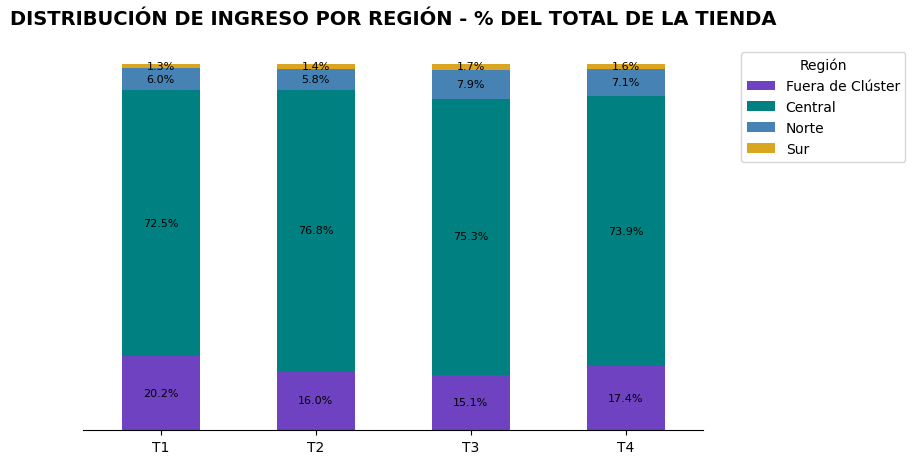

In [27]:
df_plot_regional = tabla_rendimiento_ingreso.copy()

# Reordenar las columnas para el gráfico:
# Asegúrate de que el orden de las columnas coincida con el orden de los colores.
columnas_ordenadas = ['Fuera de Clúster', 'Central', 'Norte', 'Sur']
df_plot_regional = df_plot_regional[columnas_ordenadas]

# --- VISUALIZACIÓN: GRÁFICO DE BARRAS APILADAS ---
plt.figure(figsize=(8, 4))

# Trazar el gráfico de barras apiladas
# Nota: Pasamos el eje (ax) de forma explícita, que es la forma más limpia.
ax = df_plot_regional.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    rot=0,
    # Los colores son los que definimos en la paleta estratégica
    color=['#6f42c1', '#008080', '#4682B4', '#DAA520'],
    ax=plt.gca()
)

plt.title('DISTRIBUCIÓN DE INGRESO POR REGIÓN - % DEL TOTAL DE LA TIENDA', loc='center', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Tienda')

# LIMPIEZA GRÁFICO
#plt.ylabel('Porcentaje del Ingreso Total de la Tienda (%)')
#plt.yticks(np.arange(0, 101, 10))
plt.grid(False)
ax.set_yticks([])
ax.set_xlabel('')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False) # Dejamos el spine izquierdo invisible también, ya que las marcas fueron eliminadas.

# Poner la leyenda fuera del gráfico
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')

#Añadir etiquetas de valor para T1 (opcional, pero ayuda a destacar el 20.2%)
#Se puede omitir este bloque si solo quieres el visual general.
for c in ax.containers:
   labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in c]
   ax.bar_label(c, labels=labels, label_type='center', fontsize=8)


plt.show()

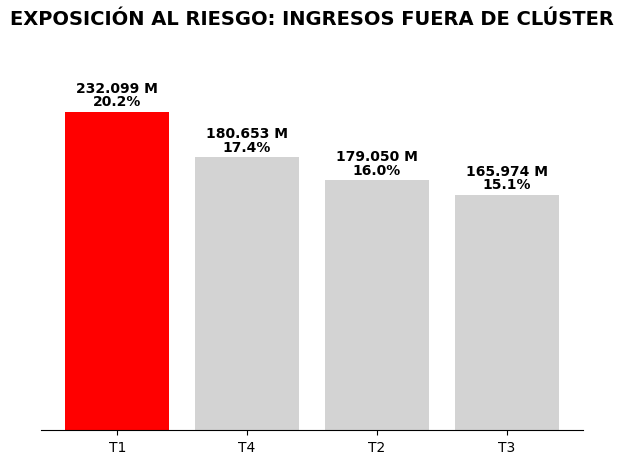

In [28]:

# Aislar solo la columna 'Fuera de Clúster' del porcentaje
df_cluster_plot = tabla_rendimiento_ingreso['Fuera de Clúster'].sort_values(ascending=False).to_frame()
df_cluster_plot.columns = ['% Riesgo']

# 1a. OBTENER LOS DATOS DE INGRESO REGIONAL EN MILLONES
# Filtramos el DF de ingresos regionales para solo 'Fuera de Clúster'
ingreso_fcl = ingreso_region[ingreso_region['Region'] == 'Fuera de Clúster'][['Tienda', 'Ingreso_Regional']]

# Unir el porcentaje y el ingreso regional
df_plot_final = df_cluster_plot.merge(ingreso_fcl,
                                     left_index=True,
                                     right_on='Tienda').set_index('Tienda')

# Calcular el Ingreso en Millones (para la etiqueta)
df_plot_final['Ingreso_Millones'] = df_plot_final['Ingreso_Regional'] / 1_000_000
# --- Fin de la Preparación ---


# --- 2. DEFINICIÓN DE COLORES ---
colores = ['red' if tienda == 'T1' else 'lightgray' for tienda in df_plot_final.index]


# --- 3. CREACIÓN DEL GRÁFICO ---
plt.figure(figsize=(7, 5))
ax = plt.gca()

# Barras
barras = ax.bar(
    df_plot_final.index,
    df_plot_final['% Riesgo'],
    color=colores
)

# --- 4. AJUSTE DE ZOOM ---
valor_minimo = df_plot_final['% Riesgo'].min()
valor_maximo = df_plot_final['% Riesgo'].max()
ax.set_ylim(valor_minimo * 0.05, valor_maximo * 1.2) # Más espacio para 2 etiquetas


# --- 5. ETIQUETAS DE DATOS (DOS LÍNEAS) ---
for bar in barras:
    tienda = bar.get_x() + bar.get_width()/2
    yval = bar.get_height()

    # Obtener el valor de Ingreso en Millones para la tienda actual
    ingreso_m = df_plot_final.loc[df_plot_final.index[list(ax.patches).index(bar)], 'Ingreso_Millones']

    # 5a. Etiqueta de Ingreso (Arriba)
    label_ingreso = f'{ingreso_m:,.3f} M'
    ax.text(
        tienda,
        yval + (valor_maximo * 0.05), # Posición más alta
        label_ingreso,
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

    # 5b. Etiqueta de Porcentaje (Abajo)
    label_porcentaje = f'{yval:.1f}%'
    ax.text(
        tienda,
        yval + (valor_maximo * 0.01), # Posición más baja, cerca de la barra
        label_porcentaje,
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )


# --- 6. LIMPIEZA EJECUTIVA ---
ax.set_title('EXPOSICIÓN AL RIESGO: INGRESOS FUERA DE CLÚSTER',
             loc='center', fontsize=14, fontweight='bold', pad=15)
ax.set_yticks([])
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
plt.grid(False)

plt.show()

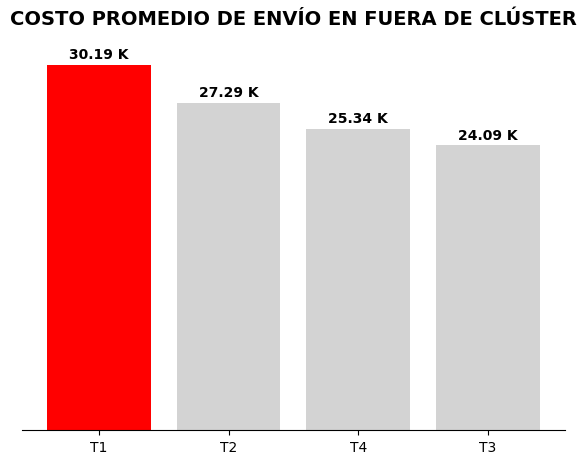

In [29]:
# --- 1. Aislar solo la columna 'Fuera de Clúster' del costo promedio de envío
df_costo_fcl_plot = tabla_costo_promedio_regional['Fuera de Clúster'].sort_values(ascending=False).to_frame()

# Renombrar la columna para simplificar las etiquetas del gráfico
df_costo_fcl_plot.columns = ['Costo Promedio Envío']

# --- 2. DEFINICIÓN DE COLORES ---
# Resaltar T1 con el color de advertencia
colores = ['red' if tienda == 'T1' else 'lightgray' for tienda in df_costo_fcl_plot.index]


# --- 3. CREACIÓN DEL GRÁFICO ---
plt.figure(figsize=(7, 5))
ax = plt.gca()

# Barras
barras = ax.bar(
    df_costo_fcl_plot.index,
    df_costo_fcl_plot['Costo Promedio Envío'],
    color=colores
)

# --- 4. AJUSTE DE ZOOM y ETIQUETAS ---
min_costo = df_costo_fcl_plot['Costo Promedio Envío'].min()
max_costo = df_costo_fcl_plot['Costo Promedio Envío'].max()

# Ajuste el límite inferior del eje Y para un zoom efectivo
ax.set_ylim(min_costo * 0.1, max_costo * 1.05)

# Etiquetas de datos
for bar in barras:
    yval = bar.get_height()
    # Formato en miles (K) con dos decimales
    label = f'{yval/1000:,.2f} K'
    ax.text(
        bar.get_x() + bar.get_width()/2,
        yval * 1.01, # Ligeramente por encima de la barra
        label,
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# --- 5. LIMPIEZA EJECUTIVA ---
ax.set_title('COSTO PROMEDIO DE ENVÍO EN FUERA DE CLÚSTER',
             loc='center', fontsize=14, fontweight='bold', pad=15)
ax.set_yticks([])
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
plt.grid(False)

plt.show()

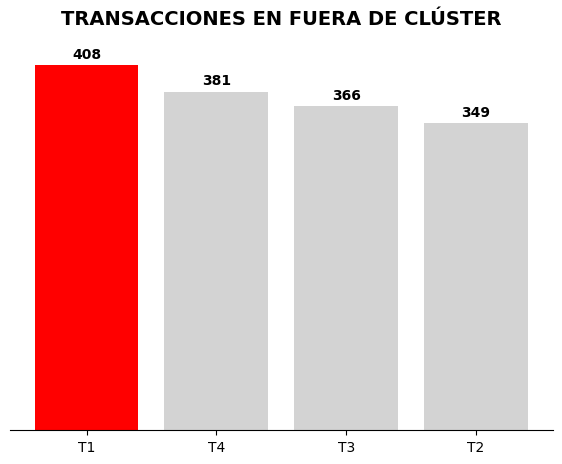

In [30]:
# --- 1. Aislar solo la columna 'Fuera de Clúster' del costo promedio de envío
df_costo_fcl_plot = tabla_conteo_regional['Fuera de Clúster'].sort_values(ascending=False).to_frame()

# Renombrar la columna para simplificar las etiquetas del gráfico
df_costo_fcl_plot.columns = ['Transacciones']

# --- 2. DEFINICIÓN DE COLORES ---
# Resaltar T1 con el color de advertencia
colores = ['red' if tienda == 'T1' else 'lightgray' for tienda in df_costo_fcl_plot.index]


# --- 3. CREACIÓN DEL GRÁFICO ---
plt.figure(figsize=(7, 5))
ax = plt.gca()

# Barras
barras = ax.bar(
    df_costo_fcl_plot.index,
    df_costo_fcl_plot['Transacciones'],
    color=colores
)

# --- 4. AJUSTE DE ZOOM y ETIQUETAS ---
min_costo = df_costo_fcl_plot['Transacciones'].min()
max_costo = df_costo_fcl_plot['Transacciones'].max()

# Ajuste el límite inferior del eje Y para un zoom efectivo
ax.set_ylim(min_costo * 0.1, max_costo * 1.05)

# Etiquetas de datos
for bar in barras:
    yval = bar.get_height()
    # Formato en miles (K) con dos decimales
    label = f'{yval:,.0f}'
    ax.text(
        bar.get_x() + bar.get_width()/2,
        yval * 1.01, # Ligeramente por encima de la barra
        label,
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

# --- 5. LIMPIEZA EJECUTIVA ---
ax.set_title('TRANSACCIONES EN FUERA DE CLÚSTER',
             loc='center', fontsize=14, fontweight='bold', pad=15)
ax.set_yticks([])
ax.set_xlabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
plt.grid(False)

plt.show()

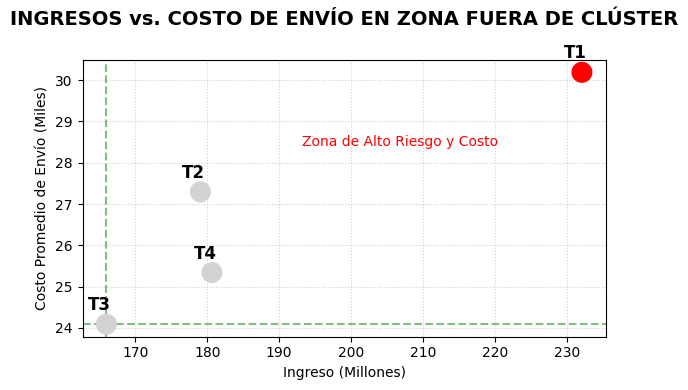

In [31]:

# --- 1. PREPARACIÓN DE DATOS

# 1a. Extraer Ingreso Regional (Millones) de tabla_ingreso_absoluto_regional
df_ingreso_fcl = tabla_ingreso_absoluto_regional['Fuera de Clúster'].copy().to_frame()
df_ingreso_fcl.columns = ['Ingreso_Millones']
df_ingreso_fcl['Ingreso_Millones'] = df_ingreso_fcl['Ingreso_Millones'] / 1_000_000 # Convertir a Millones

# 1b. Extraer Costo Promedio de tabla_costo_promedio_regional
df_costo_fcl = tabla_costo_promedio_regional['Fuera de Clúster'].copy().to_frame()
df_costo_fcl.columns = ['Costo_Envio_Promedio']
df_costo_fcl['Costo_Envio_Promedio'] = df_costo_fcl['Costo_Envio_Promedio'] / 1_000

# 1c. Unir ambos DataFrames
df_brecha = df_ingreso_fcl.merge(df_costo_fcl, left_index=True, right_index=True)


# --- 2. CREACIÓN DEL GRÁFICO DE DISPERSIÓN (SCATTER PLOT) ---
plt.figure(figsize=(6, 4))
ax = plt.gca()

# 2a. Definir colores: Rojo para T1, gris para los demás
colores_puntos = ['red' if tienda == 'T1' else 'lightgray' for tienda in df_brecha.index]

# 2b. Graficar la dispersión
ax.scatter(
    df_brecha['Ingreso_Millones'],
    df_brecha['Costo_Envio_Promedio'],
    s=200, # Tamaño de los puntos
    color=colores_puntos,
    zorder=3 # Asegurar que los puntos estén sobre la cuadrícula
)

# 2c. Etiquetar cada punto
for i, row in df_brecha.iterrows():
    ax.annotate(
        i,
        (row['Ingreso_Millones'], row['Costo_Envio_Promedio']),
        textcoords="offset points",
        xytext=(-5, 10),
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# --- 3. LIMPIEZA Y CONTEXTUALIZACIÓN ---
ax.set_title(
    'INGRESOS vs. COSTO DE ENVÍO EN ZONA FUERA DE CLÚSTER',
    loc='center',
    fontsize=14,
    fontweight='bold',
    pad=25
)

# Ejes
ax.set_xlabel('Ingreso (Millones)', fontsize=10)
ax.set_ylabel('Costo Promedio de Envío (Miles)', fontsize=10)

# Líneas de Referencia (Comparativa con T3: El Eje de Eficiencia)
t3_ingreso = df_brecha.loc['T3', 'Ingreso_Millones']
t3_costo = df_brecha.loc['T3', 'Costo_Envio_Promedio']

# Línea vertical de T3 (Volumen)
ax.axvline(t3_ingreso, color='green', linestyle='--', alpha=0.5, zorder=0)

# Línea horizontal de T3 (Costo)
ax.axhline(t3_costo, color='green', linestyle='--', alpha=0.5, zorder=0)

# Resaltar la zona de ineficiencia de T1
ax.text(df_brecha['Ingreso_Millones'].max() * 0.95, df_brecha['Costo_Envio_Promedio'].max() * 0.95,
        'Zona de Alto Riesgo y Costo', color='red', ha='right', va='top', fontsize=10)


plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

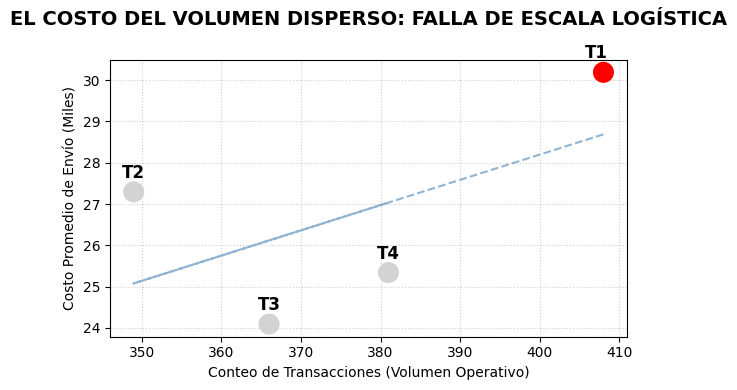

In [32]:

# Usaremos los datos reales que confirmamos, divididos por 1000:
# Costo Promedio (Y-axis) - ¡Dividido por 1000!
costo_promedio_fcl = pd.Series({
    'T1': 30189.46 / 1000,
    'T2': 27294.27 / 1000,
    'T3': 24091.53 / 1000,
    'T4': 25340.68 / 1000
}, name='Costo_Envio_Promedio')

# Conteo de Transacciones (X-axis) - Se mantiene
conteo_transacciones_fcl = pd.Series({
    'T1': 408,
    'T2': 349,
    'T3': 366,
    'T4': 381
}, name='Conteo_Transacciones')

# Unir ambos DataFrames
df_correlacion = pd.DataFrame({
    'Conteo': conteo_transacciones_fcl,
    'Costo': costo_promedio_fcl
})


# --- 2. CREACIÓN DEL GRÁFICO DE DISPERSIÓN (SCATTER PLOT) ---
plt.figure(figsize=(6, 4))
ax = plt.gca()

# 2a. Definir colores: Rojo para T1, gris para los demás
colores_puntos = ['red' if tienda == 'T1' else 'lightgray' for tienda in df_correlacion.index]

# 2b. Graficar la dispersión
ax.scatter(
    df_correlacion['Conteo'],
    df_correlacion['Costo'], # Ahora usa valores en miles
    s=200,
    color=colores_puntos,
    zorder=3
)

# 2c. Etiquetar cada punto (Ajustamos xytext para separar T1)
for i, row in df_correlacion.iterrows():
    # Ajuste de T1 para que no pegue el borde superior/derecho
    if i == 'T1':
        xytext_val = (-5, 10)
    else:
        xytext_val = (0, 10)

    ax.annotate(
        i,
        (row['Conteo'], row['Costo']),
        textcoords="offset points",
        xytext=xytext_val,
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

# --- 3. LIMPIEZA Y CONTEXTUALIZACIÓN ---
# Aumentamos el pad para separar el título
ax.set_title(
    'EL COSTO DEL VOLUMEN DISPERSO: FALLA DE ESCALA LOGÍSTICA',
    loc='center',
    fontsize=14,
    fontweight='bold',
    pad=25 # Más espacio en la parte superior
)

# Ejes
ax.set_xlabel('Conteo de Transacciones (Volumen Operativo)', fontsize=10)
# La etiqueta ahora coincide con los valores del eje Y
ax.set_ylabel('Costo Promedio de Envío (Miles)', fontsize=10)

# Línea de Tendencia (Regresión Lineal Simple para ilustrar la correlación)
z = np.polyfit(df_correlacion['Conteo'], df_correlacion['Costo'], 1)
p = np.poly1d(z)
ax.plot(
    df_correlacion['Conteo'],
    p(df_correlacion['Conteo']),
    linestyle='--',
    color='#4682B4',
    alpha=0.6,
    label='Línea de Tendencia'
)


plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

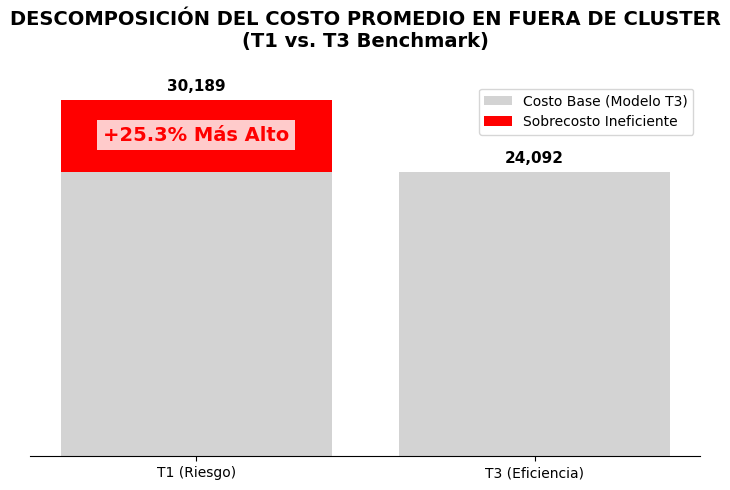

In [33]:
# --- 1. DATOS DE ENTRADA ---
Costo_T1_Real = 30189.46
Costo_T3_Benchmark = 24091.53
Brecha_Unitaria = Costo_T1_Real - Costo_T3_Benchmark # 6097.93
Brecha_PCT = (Brecha_Unitaria / Costo_T3_Benchmark) * 100 # 25.3%

# Creación de datos para el Stacked Bar (T1 y T3)
data = {
    'Tienda': ['T1 (Riesgo)', 'T3 (Eficiencia)'],
    'Costo_Base': [Costo_T3_Benchmark, Costo_T3_Benchmark],
    'Brecha_Ineficiente': [Brecha_Unitaria, 0] # Solo T1 tiene esta brecha
}
df_stacked = pd.DataFrame(data).set_index('Tienda')

# --- 2. CREACIÓN DEL GRÁFICO ---
plt.figure(figsize=(7, 5))
ax = plt.gca()

# 2a. Barra Inferior (Costo Base, Color Gris)
ax.bar(df_stacked.index, df_stacked['Costo_Base'], label='Costo Base (Modelo T3)', color='lightgray')

# 2b. Barra Superior (Brecha, Color Rojo Fuerte)
ax.bar(df_stacked.index, df_stacked['Brecha_Ineficiente'], bottom=df_stacked['Costo_Base'], label='Sobrecosto Ineficiente', color='red')

# 2c. Etiqueta de la Brecha %
ax.text(
    0, Costo_T1_Real * 0.9,
    f'+{Brecha_PCT:.1f}% Más Alto',
    ha='center',
    va='center',
    fontsize=14,
    color='red',
    fontweight='bold',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)

# 2d. Etiquetas de Valores Absolutos
ax.text(0, Costo_T1_Real + 500, f'{Costo_T1_Real:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')
ax.text(1, Costo_T3_Benchmark + 500, f'{Costo_T3_Benchmark:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# --- 3. LIMPIEZA EJECUTIVA ---
ax.set_title(
    'DESCOMPOSICIÓN DEL COSTO PROMEDIO EN FUERA DE CLUSTER\n(T1 vs. T3 Benchmark)',
    loc='center',
    fontsize=14,
    fontweight='bold',
    pad=25
)
#ax.set_ylabel('Costo Promedio de Envío por Unidad')
ax.set_yticks([]) # Ocultar ejes Y, los valores ya están etiquetados
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

In [34]:
# 1. SUMA de INGRESOS y CONTEO de TRANSACCIONES por TIENDA, REGIÓN y CATEGORÍA
# Usamos .agg() para sumar el 'Precio' y contar el número de transacciones (size)
ingreso_conteo_cat_region = df.groupby(['Tienda', 'Region', 'Categoría del Producto']).agg(
    Ingreso_Categoria=('Precio', 'sum'),
    Conteo_Categoria=('Precio', 'size') # Contamos las filas, cada fila es una transacción
).reset_index()

# 2. CÁLCULO del TOTALES POR TIENDA
total_tienda_data = df.groupby('Tienda').agg(
    Total_Tienda_Ingreso=('Precio', 'sum'),
    Total_Tienda_Conteo=('Precio', 'size')
).reset_index()

# 3. UNIR los totales al DataFrame de análisis
df_analisis_completo = ingreso_conteo_cat_region.merge(total_tienda_data, on='Tienda')

# 4. CALCULAR LOS PORCENTAJES
df_analisis_completo['% Ingreso Total'] = (df_analisis_completo['Ingreso_Categoria'] / df_analisis_completo['Total_Tienda_Ingreso']) * 100
df_analisis_completo['% Conteo Total'] = (df_analisis_completo['Conteo_Categoria'] / df_analisis_completo['Total_Tienda_Conteo']) * 100

# Redondear los porcentajes para la visualización
df_analisis_completo['% Ingreso Total'] = df_analisis_completo['% Ingreso Total'].round(1)
df_analisis_completo['% Conteo Total'] = df_analisis_completo['% Conteo Total'].round(1)

# Renombrar para usar en el resto del script (usaremos 'df_analisis' para los filtros)
df_analisis = df_analisis_completo.copy()


# Criterio de Importancia: Solo consideramos categorías que aportan al menos 0.2% del ingreso total de la tienda.
UMBRAL_IMPORTANCIA = 0.2

print("\n### ANÁLISIS COMPLETO DE CATEGORÍAS CLAVE POR REGIÓN (Incluye % de Ingreso y % de Conteo) ###")
print("-" * 75)

# Función de impresión para evitar repetición
def imprimir_resumen_region(df, region, umbral):
    print("\n--- CATEGORÍAS CLAVE EN EL CLÚSTER {} (Aporte >= {}% del Ingreso Total) ---".format(region, umbral))

    df_filtrado = df[
        (df['Region'] == region) &
        (df['% Ingreso Total'] >= umbral)
    ].sort_values(
        by=['Tienda', '% Ingreso Total'],
        ascending=[True, False]
    )

    # Seleccionamos las columnas de interés para la tabla
    df_imprimir = df_filtrado[[
        'Tienda', 'Region', 'Categoría del Producto',
        'Ingreso_Categoria', 'Conteo_Categoria',
        '% Ingreso Total', '% Conteo Total'
    ]]
    print(df_imprimir.to_string(index=False))

# Generar los resúmenes para los tres clústeres
#imprimir_resumen_region(df_analisis, 'Central', UMBRAL_IMPORTANCIA)
#imprimir_resumen_region(df_analisis, 'Norte', UMBRAL_IMPORTANCIA)
#imprimir_resumen_region(df_analisis, 'Sur', UMBRAL_IMPORTANCIA)
#imprimir_resumen_region(df_analisis, 'Fuera de Clúster', UMBRAL_IMPORTANCIA)


### ANÁLISIS COMPLETO DE CATEGORÍAS CLAVE POR REGIÓN (Incluye % de Ingreso y % de Conteo) ###
---------------------------------------------------------------------------


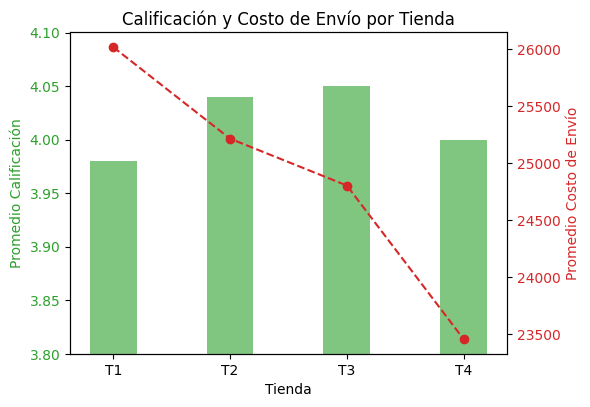

In [35]:


# --- 1. DATOS PREPARADOS ---
# Usamos las salidas que ya generaste para no correr el código fuente:

df_metricas = pd.DataFrame({
    'Tienda': ['T1', 'T2', 'T3', 'T4'],
    'Promedio Calificación': [3.98, 4.04, 4.05, 4.00], # Calificación promedio por tienda
    'Promedio Envío': [26018.61, 25216.24, 24805.68, 23459.46], # Costo de envío
    'Ingreso Total': [1150880400, 1116343500, 1098019600, 1038375700] # Ingreso total por tienda
})


# --- GRÁFICO 2: CALIFICACIÓN Y ENVÍO (Doble Eje) ---
fig, ax1 = plt.subplots(figsize=(6, 4))

# Eje principal (Izquierdo) para la Calificación
color = 'tab:green'
ax1.set_xlabel('Tienda')
ax1.set_ylabel('Promedio Calificación', color=color)
ax1.bar(df_metricas['Tienda'], df_metricas['Promedio Calificación'], color=color, alpha=0.6, width=0.4, align='center')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(3.8, 4.1) # Ajustamos el límite para visualizar la diferencia de T1

# Eje secundario (Derecho) para el Costo de Envío
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Promedio Costo de Envío', color=color)
ax2.plot(df_metricas['Tienda'], df_metricas['Promedio Envío'], color=color, marker='o', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Calificación y Costo de Envío por Tienda')
plt.show()

# **INFORME FINAL**

## Recomendaciones:

El Sr. João debe vender la Tienda T1, es la tienda que destruye el margen de rentabilidad y genera el mayor riesgo operativo.

**Razones:**

1. Justificación Financiera: Alto Riesgo y Sobrecosto. El ingreso de la Tienda T1 es engañoso, ya que su rentabilidad es severamente mermada por su estructura logística:
- Costo ineficiente: El costo de envío en la región crítica "Fuera de Clúster" de T1 es de 30K, lo que representa un sobrecosto de +25.3% en comparación con el benchmark T3 24.09K.

- Falla de Escala Logística: T1 está operando en la Zona de Alto Riesgo y Costo, donde el alto volumen operativo 408 transacciones en Fuera de Clúster está directamente correlacionado con el aumento del costo promedio.

- Brecha Cuantificada: Esta ineficiencia está generando una pérdida de margen equivalente a 2.47 millones anuales (el costo de la ineficiencia).

- Vender T1 eliminaría inmediatamente esta fuga de capital logístico.

2. Justificación Operativa: Ineficiencia Estructural
- El problema en T1 es estructural y geográfico, no transitorio.

- Mayor Exposición al Riesgo: El 20.2% del ingreso total de T1 proviene de la costosa región "Fuera de Clúster", la mayor exposición de todas las tiendas.

- Problema Confirmado: El análisis demuestra que el problema NO es la mezcla de productos, ya que el volumen por categoría es similar en T1 y T3. Por lo tanto, la ineficiencia reside en la cobertura y la gestión de la última milla.

3. Justificación de Servicio al Cliente
- Peor Calificación Promedio: T1 tiene la Calificación Promedio más baja 3.98. Esto es probablemente una consecuencia directa de los altos costos y la dispersión, lo que resulta en un peor servicio de entrega, impactando negativamente la imagen de la red.